In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/sid0049_games.csv")
df

,Event,Site,Date,Round,White,Black,Result,Tournament,CurrentPosition,Timezone,...,UTCTime,WhiteELO,BlackELO,TimeControl,Termination,StartTime,EndDate,EndTime,Link,Moves
0,Let's Play!,Chess.com,2017.02.09,-,renzoronchi,sid0049,0-1,-,8/5ppp/R7/8/3p4/2kb4/5PPP/5K2 w - - 2 31,UTC,...,08:54:56,1305,1342,1/172800,sid0049 won by resignation,08:54:56,2017.02.25,09:42:42,https://www.chess.com/game/daily/157121921,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Bxc6 bxc6 5. ...
1,Let's Play!,Chess.com,2017.02.07,-,timorlang,sid0049,0-1,-,4r2k/p5p1/3p3p/2pQ1R2/3b4/7P/PPP3P1/2q2K2 w - ...,UTC,...,03:05:39,1135,1147,1/86400,sid0049 won by checkmate,03:05:39,2017.02.20,13:34:46,https://www.chess.com/game/daily/156927180,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. ...
2,Let's Play!,Chess.com,2017.02.07,-,sid0049,firefox7,0-1,-,r4rk1/1ppb1ppp/1b2Nn2/pP2p3/P3P3/2PP2NP/5qP1/2...,UTC,...,03:05:55,779,1385,1/86400,firefox7 won by checkmate,03:05:55,2017.02.17,12:46:37,https://www.chess.com/game/daily/156927190,1. e4 e5 2. Nf3 d6 3. d3 Nf6 4. h3 Nc6 5. Nc3 ...
3,Live Chess,Chess.com,2017.02.28,-,polaroid32,sid0049,0-1,-,8/4n3/2k5/p1P1p3/P1K1P1r1/8/8/8 w - -,UTC,...,10:37:56,1148,1127,600,sid0049 won by resignation,10:37:56,2017.02.28,10:53:22,https://www.chess.com/game/live/1973707219,1. e4 {[%clk 0:10:00]} 1... c5 {[%clk 0:09:59....
4,Live Chess,Chess.com,2017.02.28,-,laitheskander,sid0049,1-0,-,1r6/4kb1R/2Nn1p2/3p4/p6P/2P1P3/PP3R2/2K5 b - -,UTC,...,10:29:07,1173,1118,600,laitheskander won by resignation,10:29:07,2017.02.28,10:37:21,https://www.chess.com/game/live/1973699110,1. d4 {[%clk 0:10:00]} 1... d5 {[%clk 0:09:56....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,Live Chess,Chess.com,2022.10.18,-,sid0049,sorivicks,1-0,-,2r2k1Q/2p1pp2/brq3p1/3pPPN1/1p1P2P1/6RP/PpP2R2...,UTC,...,13:48:17,2083,878,600,sid0049 won by checkmate,13:48:17,2022.10.18,14:02:56,https://www.chess.com/game/live/59839830845,1. e4 {[%clk 0:10:00]} 1... g6 {[%clk 0:10:00]...
7068,Live Chess,Chess.com,2022.10.18,-,sorivicks,sid0049,0-1,-,6k1/pp3pp1/7p/8/8/P7/5PPP/4r1K1 w - -,UTC,...,09:34:23,878,2083,600,sid0049 won by checkmate,09:34:23,2022.10.18,09:44:51,https://www.chess.com/game/live/59824761641,1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...
7069,Live Chess,Chess.com,2022.10.18,-,sid0049,sorivicks,1-0,-,7r/Q4p1p/3Rkp2/1pp3q1/2b3P1/2P2BBP/P3PK2/7R b - -,UTC,...,09:22:30,2083,878,600,sid0049 won by checkmate,09:22:30,2022.10.18,09:33:36,https://www.chess.com/game/live/59823657197,1. c4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...
7070,Live Chess,Chess.com,2022.10.18,-,sorivicks,sid0049,1/2-1/2,-,8/8/4p2p/3p3P/3P1p1K/5k2/8/5q2 w - -,UTC,...,09:15:27,878,2083,600,Game drawn by stalemate,09:15:27,2022.10.18,09:22:01,https://www.chess.com/game/live/59823573287,1. e4 {[%clk 0:10:00]} 1... c6 {[%clk 0:10:00]...


In [3]:
def getopeningtype(eco):
    ff = eco.split('/')[-1].split('-')
    opening_type = f"{ff[0]} {ff[1]}"
    return opening_type


def my_colour(white):
    if white == "sid0049":
        return "White"
    else:
        return "Black"


def my_result(string):
    name = string.split()[0]
    if name == "Game":
        return "Draw"
    elif name == "sid0049":
        return "Win"
    else:
        return "Loss"


def result_method(string):
    method = string.split()[-1].title()
    if method == "Rule":
        return "50-move rule"
    elif method == "Material":
        return "Insufficient material"
    else:
        return method


def rating_diff(colour, w_elo, b_elo):
    """opponent - mine. [Colour, white ELO, black ELO]"""
    diffs = []
    for i in range(len(colour)):
        if colour[i] == "White":
            x, y = w_elo[i], b_elo[i]
        else:
            y, x = w_elo[i], b_elo[i]
        diffs.append(y-x)
    se = pd.Series(diffs)
    return se


def num_moves(moves, n=-5):
    """Recursive function to return number of moves"""
    move = moves.split()[n].replace('.', '')
    try:
        return int(move)
    except ValueError:
        return num_moves(moves, n+1)


def time_played(start_dates, start_times, end_dates, end_times):
    """Return time th egame was played"""
    se_l = []
    for i in range(len(start_dates)):
        start = pd.to_datetime(start_dates[i] + ' ' + start_times[i])
        end = pd.to_datetime(end_dates[i] + ' ' + end_times[i])
        se_l.append(end-start)
    se_d = pd.Series(se_l)
    se = se_d.dt.total_seconds().astype('int')
    return se

In [4]:
df["Opening Type"] = df["ECOURL"].apply(getopeningtype)
df["Colour"] = df["White"].apply(my_colour)
df["Result_me"] = df["Termination"].apply(my_result)
df["Result method"] = df["Termination"].apply(result_method)
df["Rating diff (opp-me)"] = rating_diff(df["Colour"], df["WhiteELO"], df["BlackELO"])
df["No. of moves"] = df["Moves"].apply(num_moves)
df["Time played"] = time_played(df["Date"], df["StartTime"], df["EndDate"], df["EndTime"])
df

,Event,Site,Date,Round,White,Black,Result,Tournament,CurrentPosition,Timezone,...,EndTime,Link,Moves,Opening Type,Colour,Result_me,Result method,Rating diff (opp-me),No. of moves,Time played
0,Let's Play!,Chess.com,2017.02.09,-,renzoronchi,sid0049,0-1,-,8/5ppp/R7/8/3p4/2kb4/5PPP/5K2 w - - 2 31,UTC,...,09:42:42,https://www.chess.com/game/daily/157121921,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Bxc6 bxc6 5. ...,Ruy Lopez,Black,Win,Resignation,-37,30,1385266
1,Let's Play!,Chess.com,2017.02.07,-,timorlang,sid0049,0-1,-,4r2k/p5p1/3p3p/2pQ1R2/3b4/7P/PPP3P1/2q2K2 w - ...,UTC,...,13:34:46,https://www.chess.com/game/daily/156927180,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. ...,Ruy Lopez,Black,Win,Checkmate,-12,26,1160947
2,Let's Play!,Chess.com,2017.02.07,-,sid0049,firefox7,0-1,-,r4rk1/1ppb1ppp/1b2Nn2/pP2p3/P3P3/2PP2NP/5qP1/2...,UTC,...,12:46:37,https://www.chess.com/game/daily/156927190,1. e4 e5 2. Nf3 d6 3. d3 Nf6 4. h3 Nc6 5. Nc3 ...,Philidor Defense,White,Loss,Checkmate,606,17,898842
3,Live Chess,Chess.com,2017.02.28,-,polaroid32,sid0049,0-1,-,8/4n3/2k5/p1P1p3/P1K1P1r1/8/8/8 w - -,UTC,...,10:53:22,https://www.chess.com/game/live/1973707219,1. e4 {[%clk 0:10:00]} 1... c5 {[%clk 0:09:59....,Sicilian Defense,Black,Win,Resignation,21,52,926
4,Live Chess,Chess.com,2017.02.28,-,laitheskander,sid0049,1-0,-,1r6/4kb1R/2Nn1p2/3p4/p6P/2P1P3/PP3R2/2K5 b - -,UTC,...,10:37:21,https://www.chess.com/game/live/1973699110,1. d4 {[%clk 0:10:00]} 1... d5 {[%clk 0:09:56....,Queens Pawn,Black,Loss,Resignation,55,33,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,Live Chess,Chess.com,2022.10.18,-,sid0049,sorivicks,1-0,-,2r2k1Q/2p1pp2/brq3p1/3pPPN1/1p1P2P1/6RP/PpP2R2...,UTC,...,14:02:56,https://www.chess.com/game/live/59839830845,1. e4 {[%clk 0:10:00]} 1... g6 {[%clk 0:10:00]...,Modern Defense,White,Win,Checkmate,-1205,29,879
7068,Live Chess,Chess.com,2022.10.18,-,sorivicks,sid0049,0-1,-,6k1/pp3pp1/7p/8/8/P7/5PPP/4r1K1 w - -,UTC,...,09:44:51,https://www.chess.com/game/live/59824761641,1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...,Vienna Game,Black,Win,Checkmate,-1205,28,628
7069,Live Chess,Chess.com,2022.10.18,-,sid0049,sorivicks,1-0,-,7r/Q4p1p/3Rkp2/1pp3q1/2b3P1/2P2BBP/P3PK2/7R b - -,UTC,...,09:33:36,https://www.chess.com/game/live/59823657197,1. c4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...,English Opening,White,Win,Checkmate,-1205,23,666
7070,Live Chess,Chess.com,2022.10.18,-,sorivicks,sid0049,1/2-1/2,-,8/8/4p2p/3p3P/3P1p1K/5k2/8/5q2 w - -,UTC,...,09:22:01,https://www.chess.com/game/live/59823573287,1. e4 {[%clk 0:10:00]} 1... c6 {[%clk 0:10:00]...,Caro Kann,Black,Draw,Stalemate,-1205,45,394


In [5]:
def minutes_played(time):
    """Convert Time played from seconds to minutes"""
    mn = int(time/60)
    return mn

dfnot600 = df[df["TimeControl"] != "600"]
dfnot600 = dfnot600.reset_index(drop=True)

df600 = df.loc[df["TimeControl"] == "600"]
df600 = df600.reset_index(drop=True)
df600["Time played"] = df600["Time played"].apply(minutes_played)
df600
# df600

,Event,Site,Date,Round,White,Black,Result,Tournament,CurrentPosition,Timezone,...,EndTime,Link,Moves,Opening Type,Colour,Result_me,Result method,Rating diff (opp-me),No. of moves,Time played
0,Live Chess,Chess.com,2017.02.28,-,polaroid32,sid0049,0-1,-,8/4n3/2k5/p1P1p3/P1K1P1r1/8/8/8 w - -,UTC,...,10:53:22,https://www.chess.com/game/live/1973707219,1. e4 {[%clk 0:10:00]} 1... c5 {[%clk 0:09:59....,Sicilian Defense,Black,Win,Resignation,21,52,15
1,Live Chess,Chess.com,2017.02.28,-,laitheskander,sid0049,1-0,-,1r6/4kb1R/2Nn1p2/3p4/p6P/2P1P3/PP3R2/2K5 b - -,UTC,...,10:37:21,https://www.chess.com/game/live/1973699110,1. d4 {[%clk 0:10:00]} 1... d5 {[%clk 0:09:56....,Queens Pawn,Black,Loss,Resignation,55,33,8
2,Live Chess,Chess.com,2017.02.28,-,sid0049,yerdy,0-1,-,r1b1k2r/pp1p1ppp/8/7Q/8/1B3n2/PPP2PPP/R1B1qK1R...,UTC,...,10:28:47,https://www.chess.com/game/live/1973695525,1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:09:59....,Petrovs Defense,White,Loss,Checkmate,-47,12,3
3,Live Chess,Chess.com,2017.02.28,-,sid0049,saviche1989,1-0,-,R7/8/8/8/8/8/k1K5/8 b - -,UTC,...,09:58:14,https://www.chess.com/game/live/1973658623,1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...,Philidor Defense,White,Win,Checkmate,5,62,12
4,Live Chess,Chess.com,2017.02.28,-,saviche1989,sid0049,0-1,-,7k/p3b2p/5p1K/8/P6r/8/8/8 w - -,UTC,...,09:45:14,https://www.chess.com/game/live/1973650351,1. e4 {[%clk 0:10:00]} 1... c5 {[%clk 0:09:59....,Sicilian Defense,Black,Win,Checkmate,21,39,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,Live Chess,Chess.com,2022.10.18,-,sid0049,sorivicks,1-0,-,2r2k1Q/2p1pp2/brq3p1/3pPPN1/1p1P2P1/6RP/PpP2R2...,UTC,...,14:02:56,https://www.chess.com/game/live/59839830845,1. e4 {[%clk 0:10:00]} 1... g6 {[%clk 0:10:00]...,Modern Defense,White,Win,Checkmate,-1205,29,14
5302,Live Chess,Chess.com,2022.10.18,-,sorivicks,sid0049,0-1,-,6k1/pp3pp1/7p/8/8/P7/5PPP/4r1K1 w - -,UTC,...,09:44:51,https://www.chess.com/game/live/59824761641,1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...,Vienna Game,Black,Win,Checkmate,-1205,28,10
5303,Live Chess,Chess.com,2022.10.18,-,sid0049,sorivicks,1-0,-,7r/Q4p1p/3Rkp2/1pp3q1/2b3P1/2P2BBP/P3PK2/7R b - -,UTC,...,09:33:36,https://www.chess.com/game/live/59823657197,1. c4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...,English Opening,White,Win,Checkmate,-1205,23,11
5304,Live Chess,Chess.com,2022.10.18,-,sorivicks,sid0049,1/2-1/2,-,8/8/4p2p/3p3P/3P1p1K/5k2/8/5q2 w - -,UTC,...,09:22:01,https://www.chess.com/game/live/59823573287,1. e4 {[%clk 0:10:00]} 1... c6 {[%clk 0:10:00]...,Caro Kann,Black,Draw,Stalemate,-1205,45,6


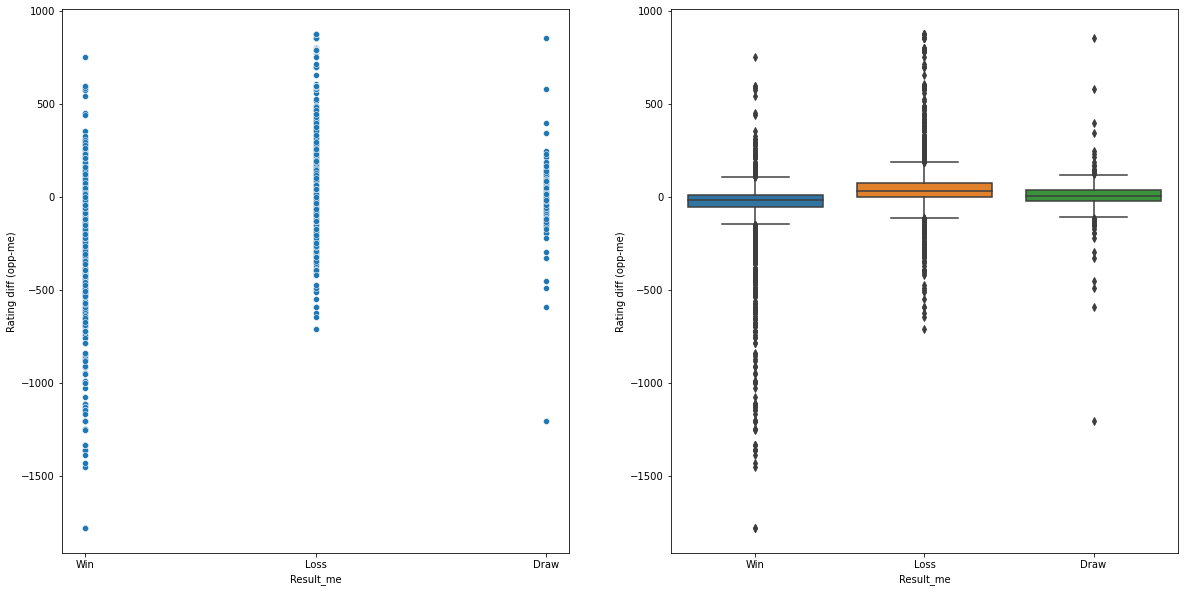

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

sns.scatterplot(ax=ax1, x=df["Result_me"], y=df["Rating diff (opp-me)"])
sns.boxplot(ax=ax2, x=df["Result_me"], y=df["Rating diff (opp-me)"])

plt.show()

In [7]:
sns.set(rc={"figure.figsize":(14, 7)})

<AxesSubplot:xlabel='Rating diff (opp-me)', ylabel='Result_me'>

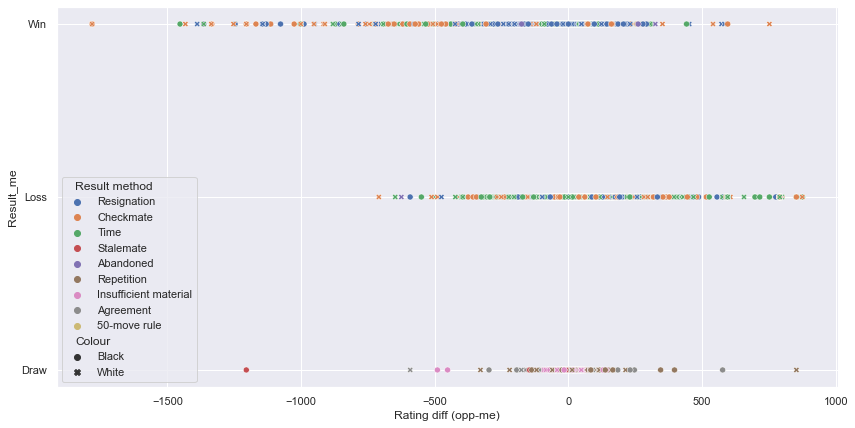

In [8]:
sns.scatterplot(x=df["Rating diff (opp-me)"], y=df["Result_me"], hue=df["Result method"], style=df["Colour"])

[Text(0, 0, '2543'), Text(0, 0, '2495'), Text(0, 0, '268')]

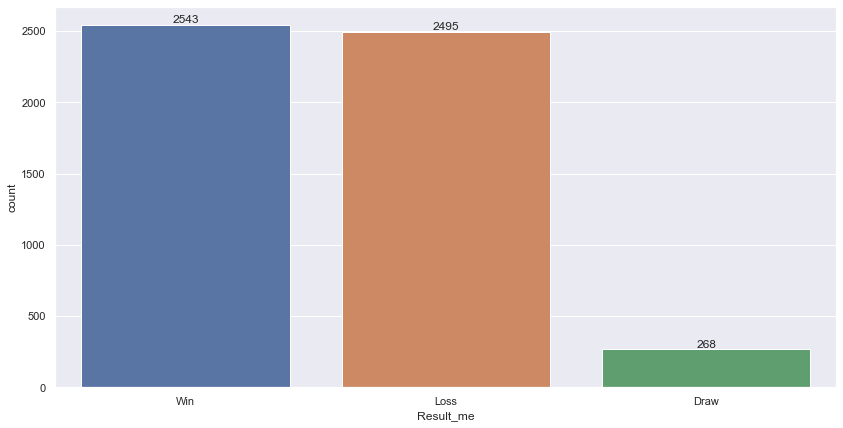

In [9]:
ax = sns.countplot(x=df600["Result_me"])
ax.bar_label(ax.containers[0])

[Text(0, 0, '3294'), Text(0, 0, '3447'), Text(0, 0, '331')]

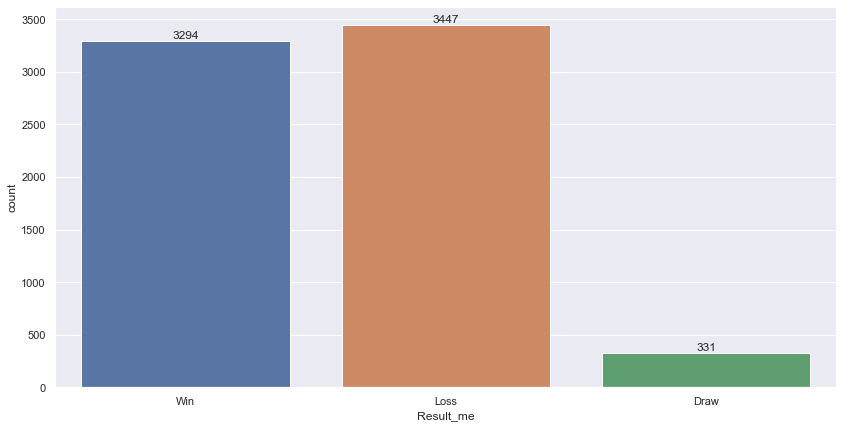

In [30]:
ax = sns.countplot(x=df["Result_me"])
ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='Result_me', ylabel='count'>

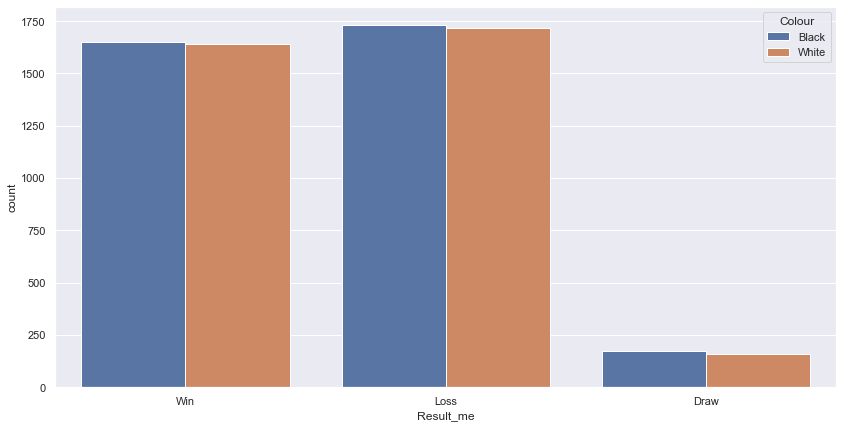

In [28]:
sns.countplot(data=df, x="Result_me", hue="Colour")

<AxesSubplot:xlabel='Colour', ylabel='count'>

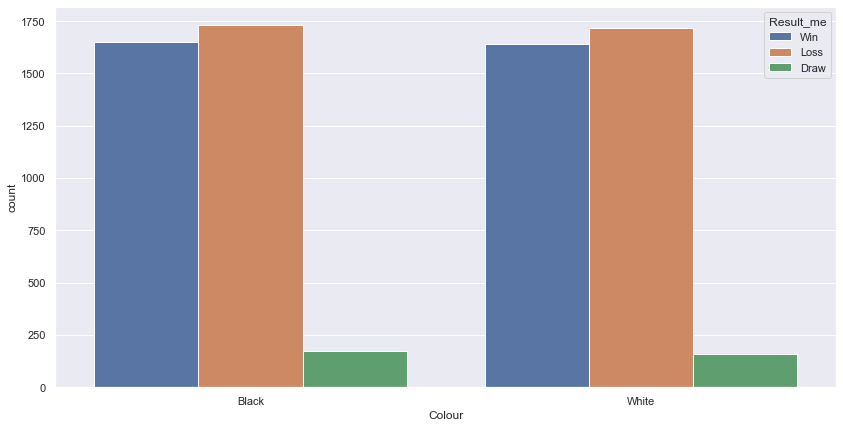

In [29]:
sns.countplot(data=df, x="Colour", hue="Result_me")

<AxesSubplot:xlabel='Time played', ylabel='count'>

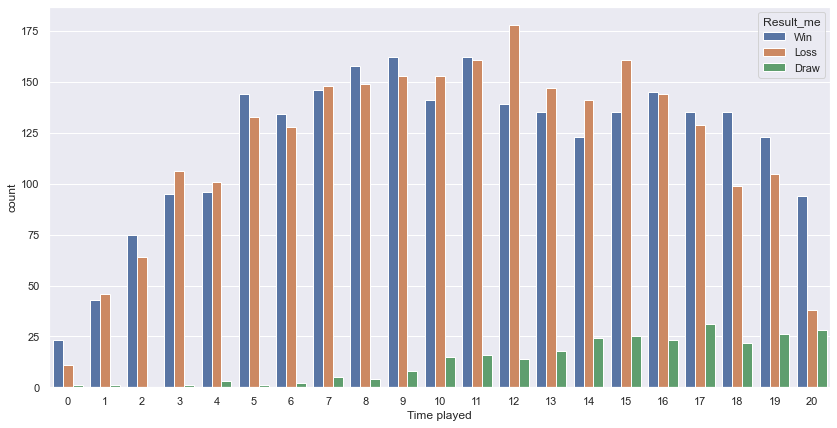

In [10]:
sns.countplot(x=df600["Time played"], hue=df600["Result_me"])

In [11]:
def df_filter_openings(duf, n=90):
    oi = (duf["Opening Type"].value_counts()[duf["Opening Type"].value_counts() > n]).reset_index()
    return duf[duf["Opening Type"].isin(oi["index"].values)]

Text(0.5, 0, 'Not 10+0 games')

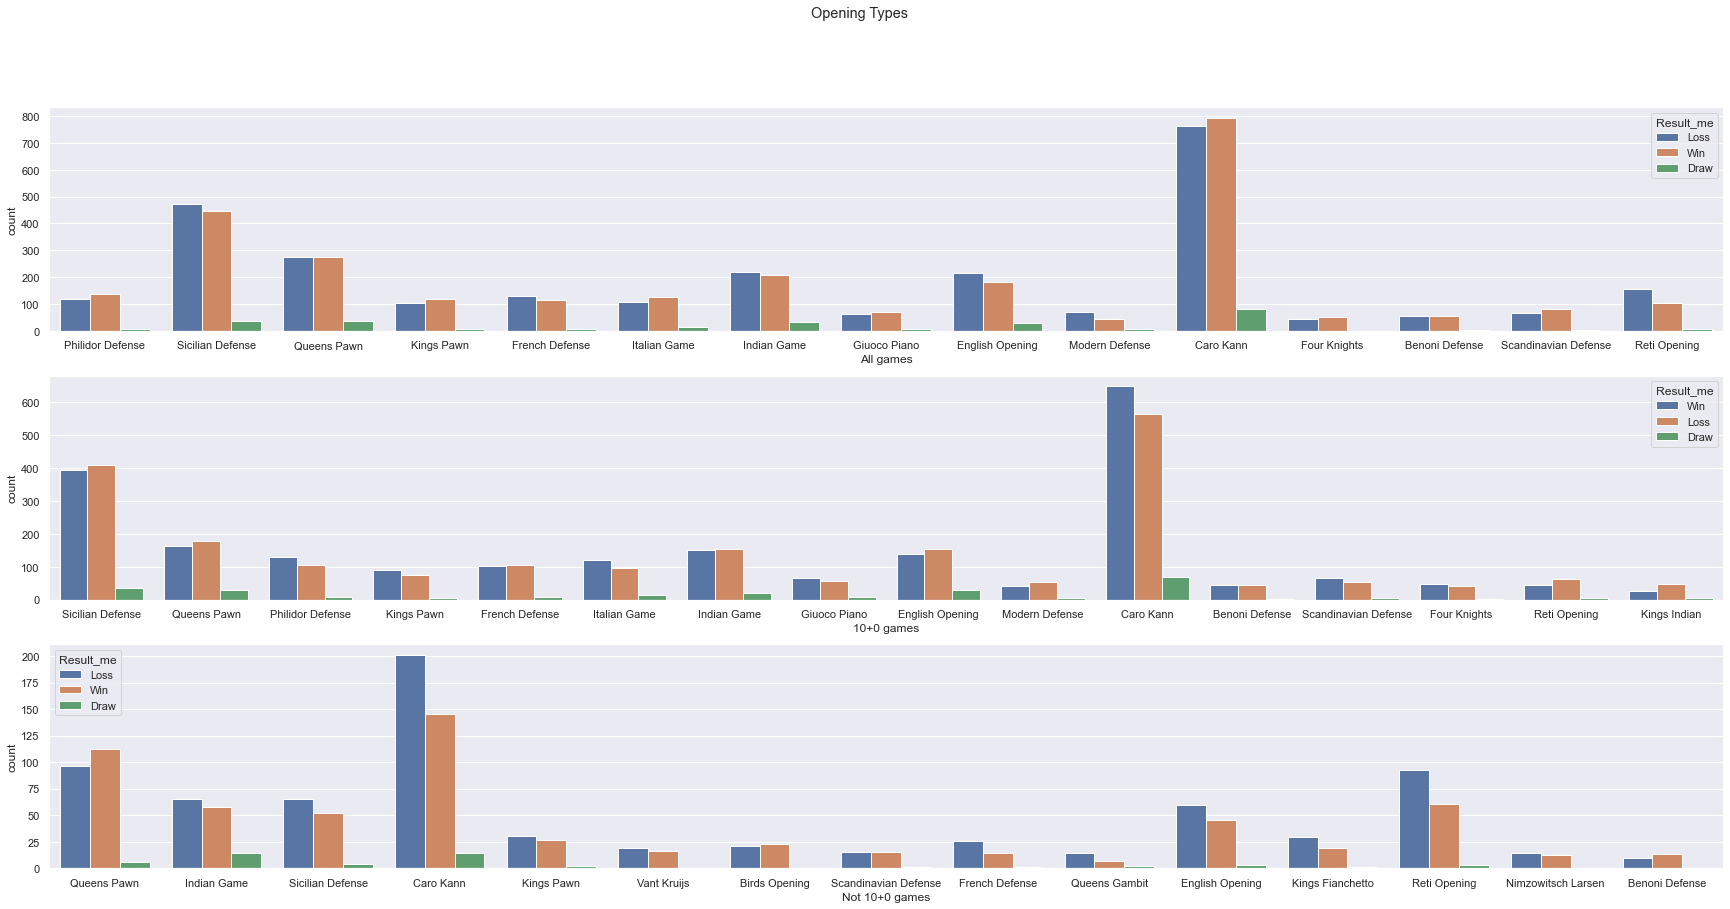

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(30, 14))
fig.suptitle("Opening Types")
sns.countplot(x="Opening Type", data=df_filter_openings(df), hue="Result_me", ax=ax1)
ax1.set_xlabel("All games")
sns.countplot(x="Opening Type", data=df_filter_openings(df600, 80), hue="Result_me", ax=ax2)
ax2.set_xlabel("10+0 games")
sns.countplot(x="Opening Type", data=df_filter_openings(dfnot600, 22), hue="Result_me", ax=ax3)
ax3.set_xlabel("Not 10+0 games")

<AxesSubplot:xlabel='No. of moves', ylabel='Proportion'>

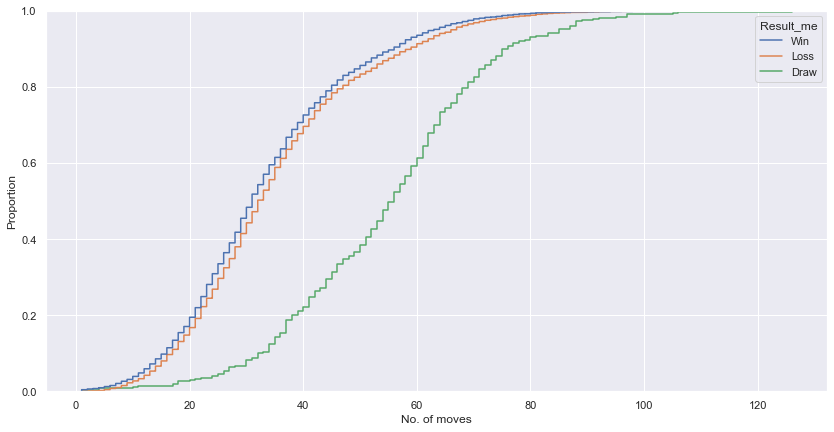

In [38]:
sns.ecdfplot(data=df, x="No. of moves", hue="Result_me")

<AxesSubplot:xlabel='No. of moves', ylabel='Proportion'>

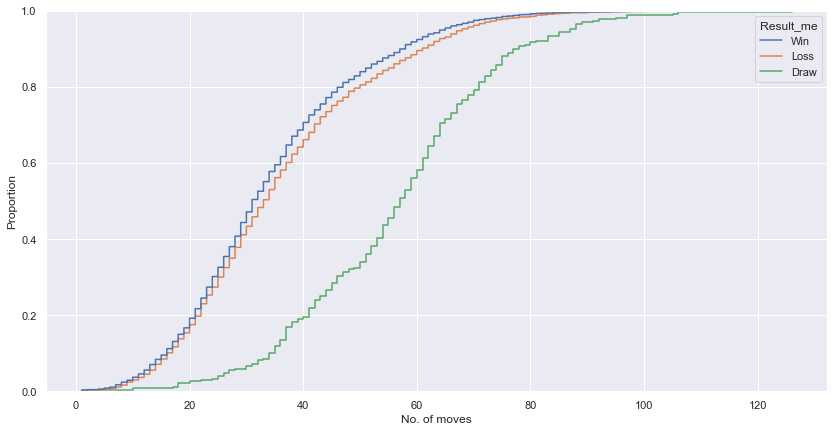

In [39]:
sns.ecdfplot(data=df600, x="No. of moves", hue="Result_me")

<AxesSubplot:xlabel='No. of moves', ylabel='Opening Type'>

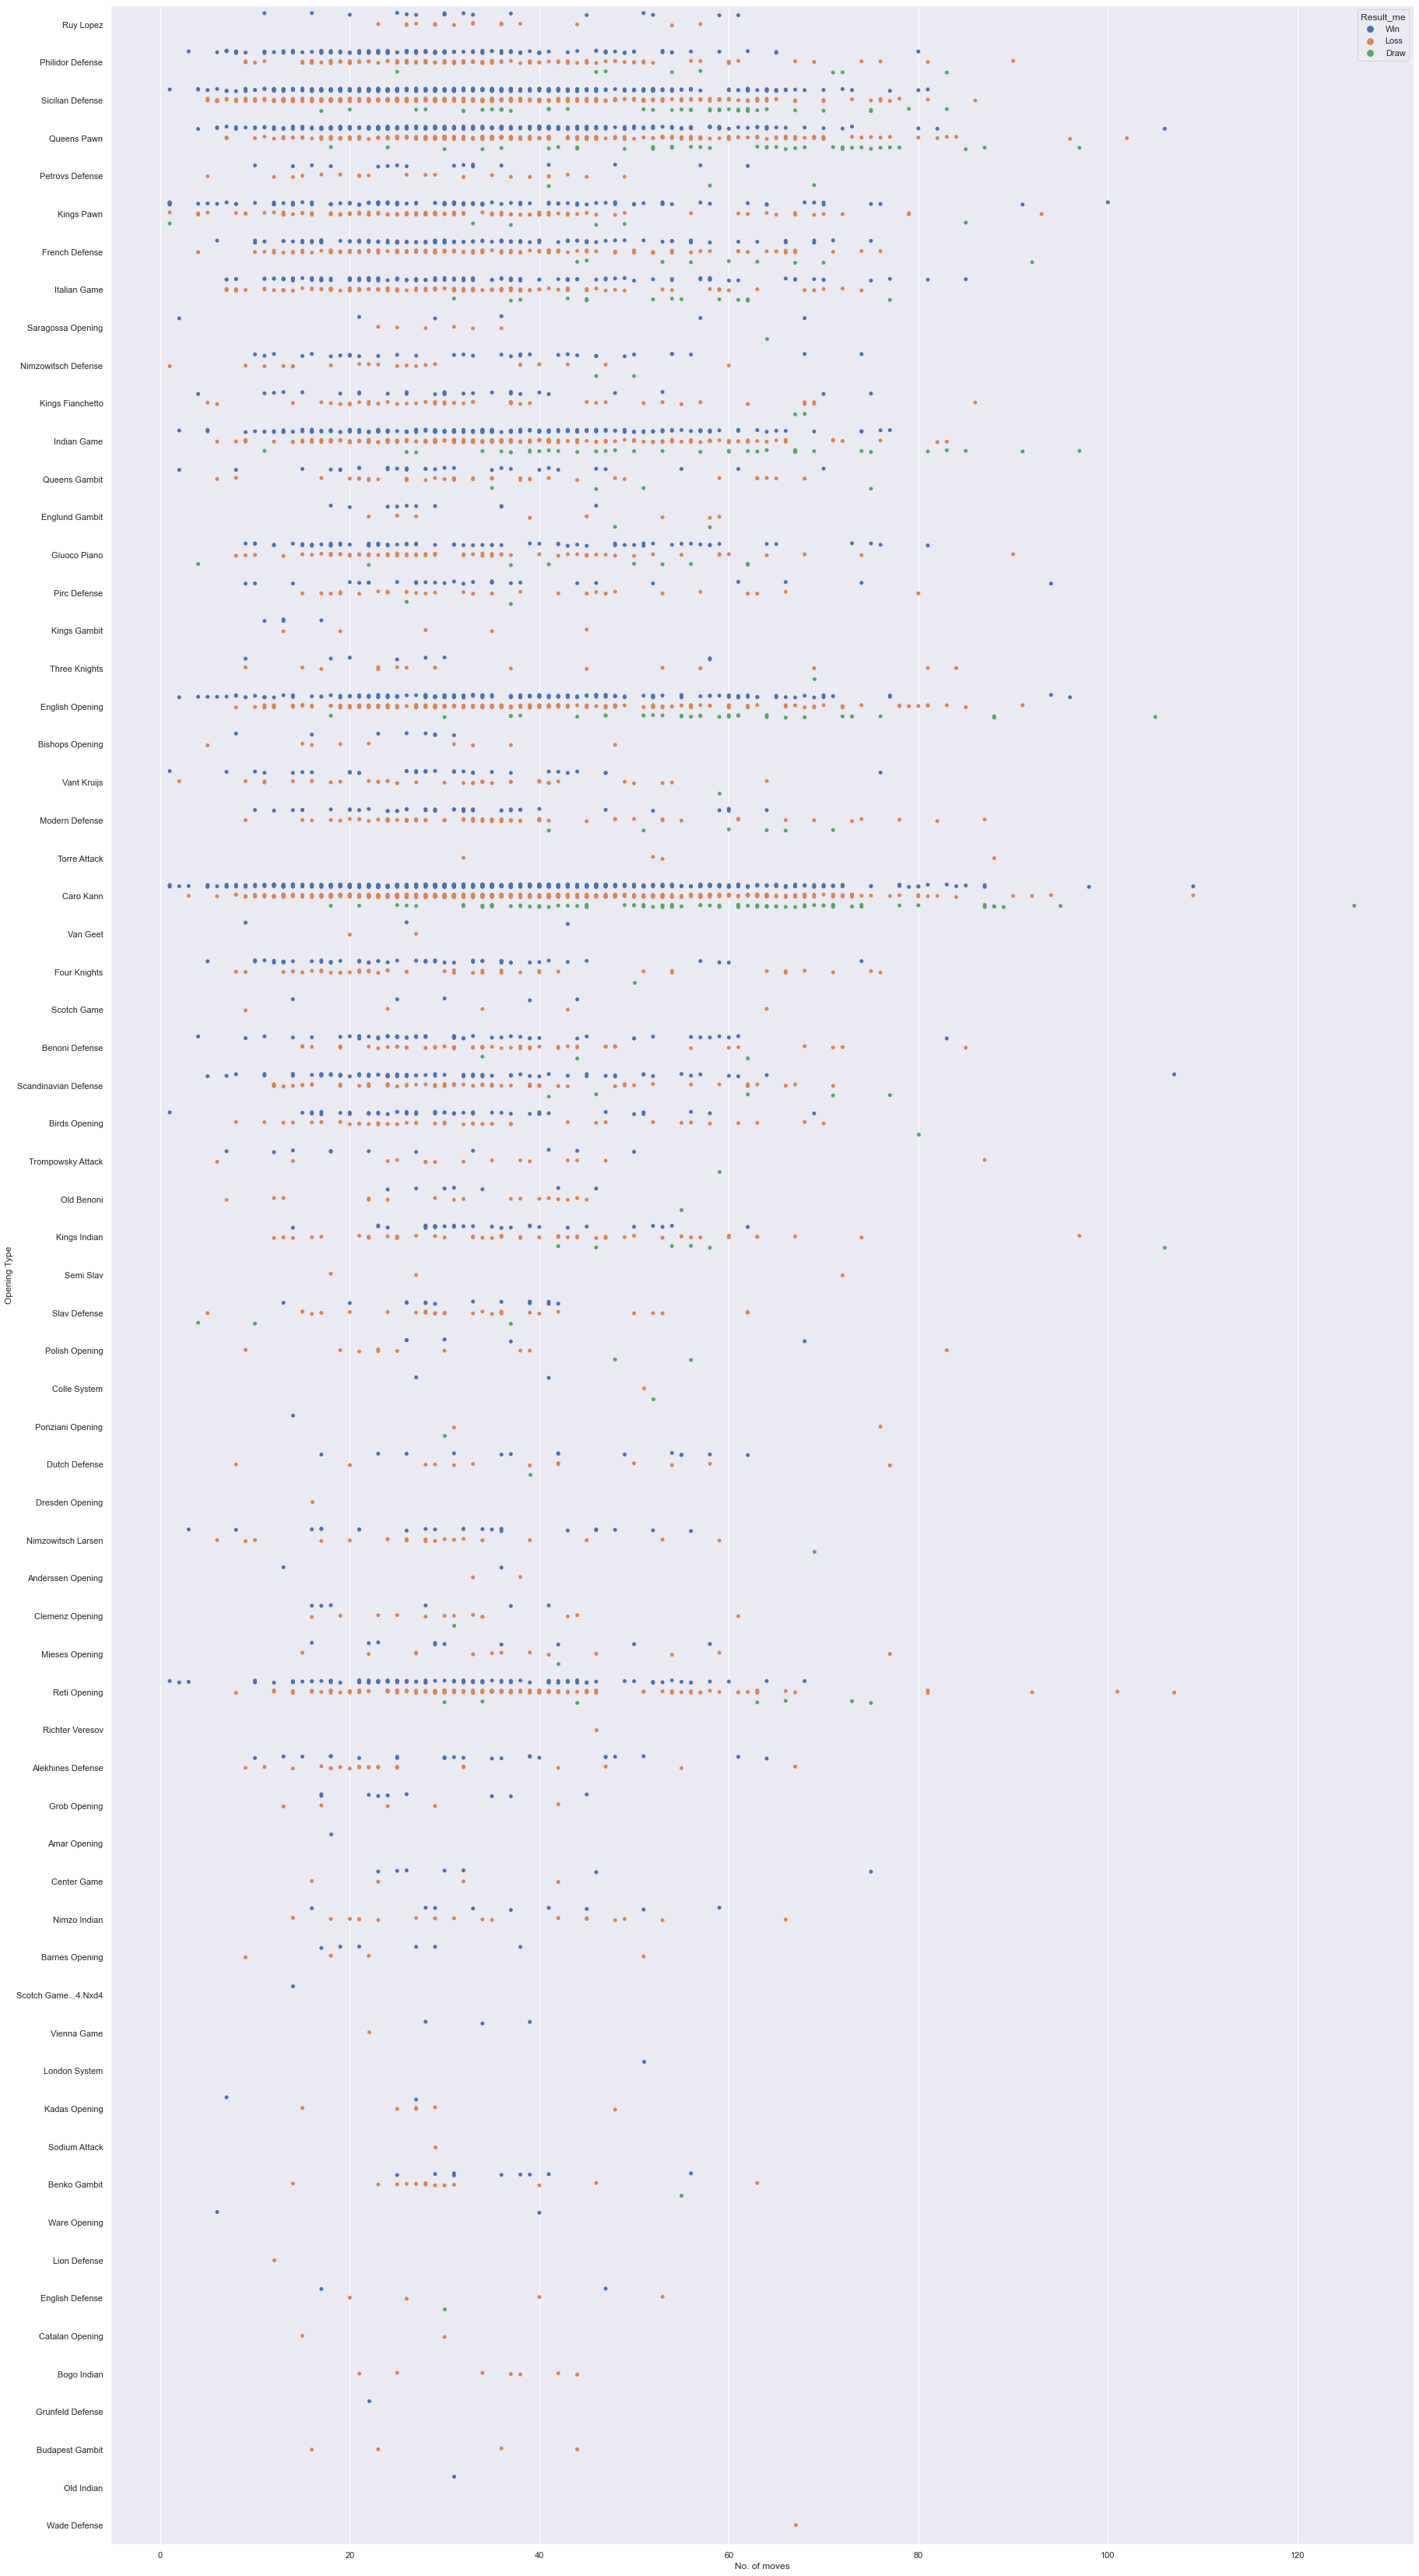

In [37]:
fig, ax = plt.subplots(figsize=(30,60))
sns.stripplot(data=df, x="No. of moves", y="Opening Type", hue="Result_me", dodge=True)

<AxesSubplot:xlabel='No. of moves', ylabel='Opening Type'>

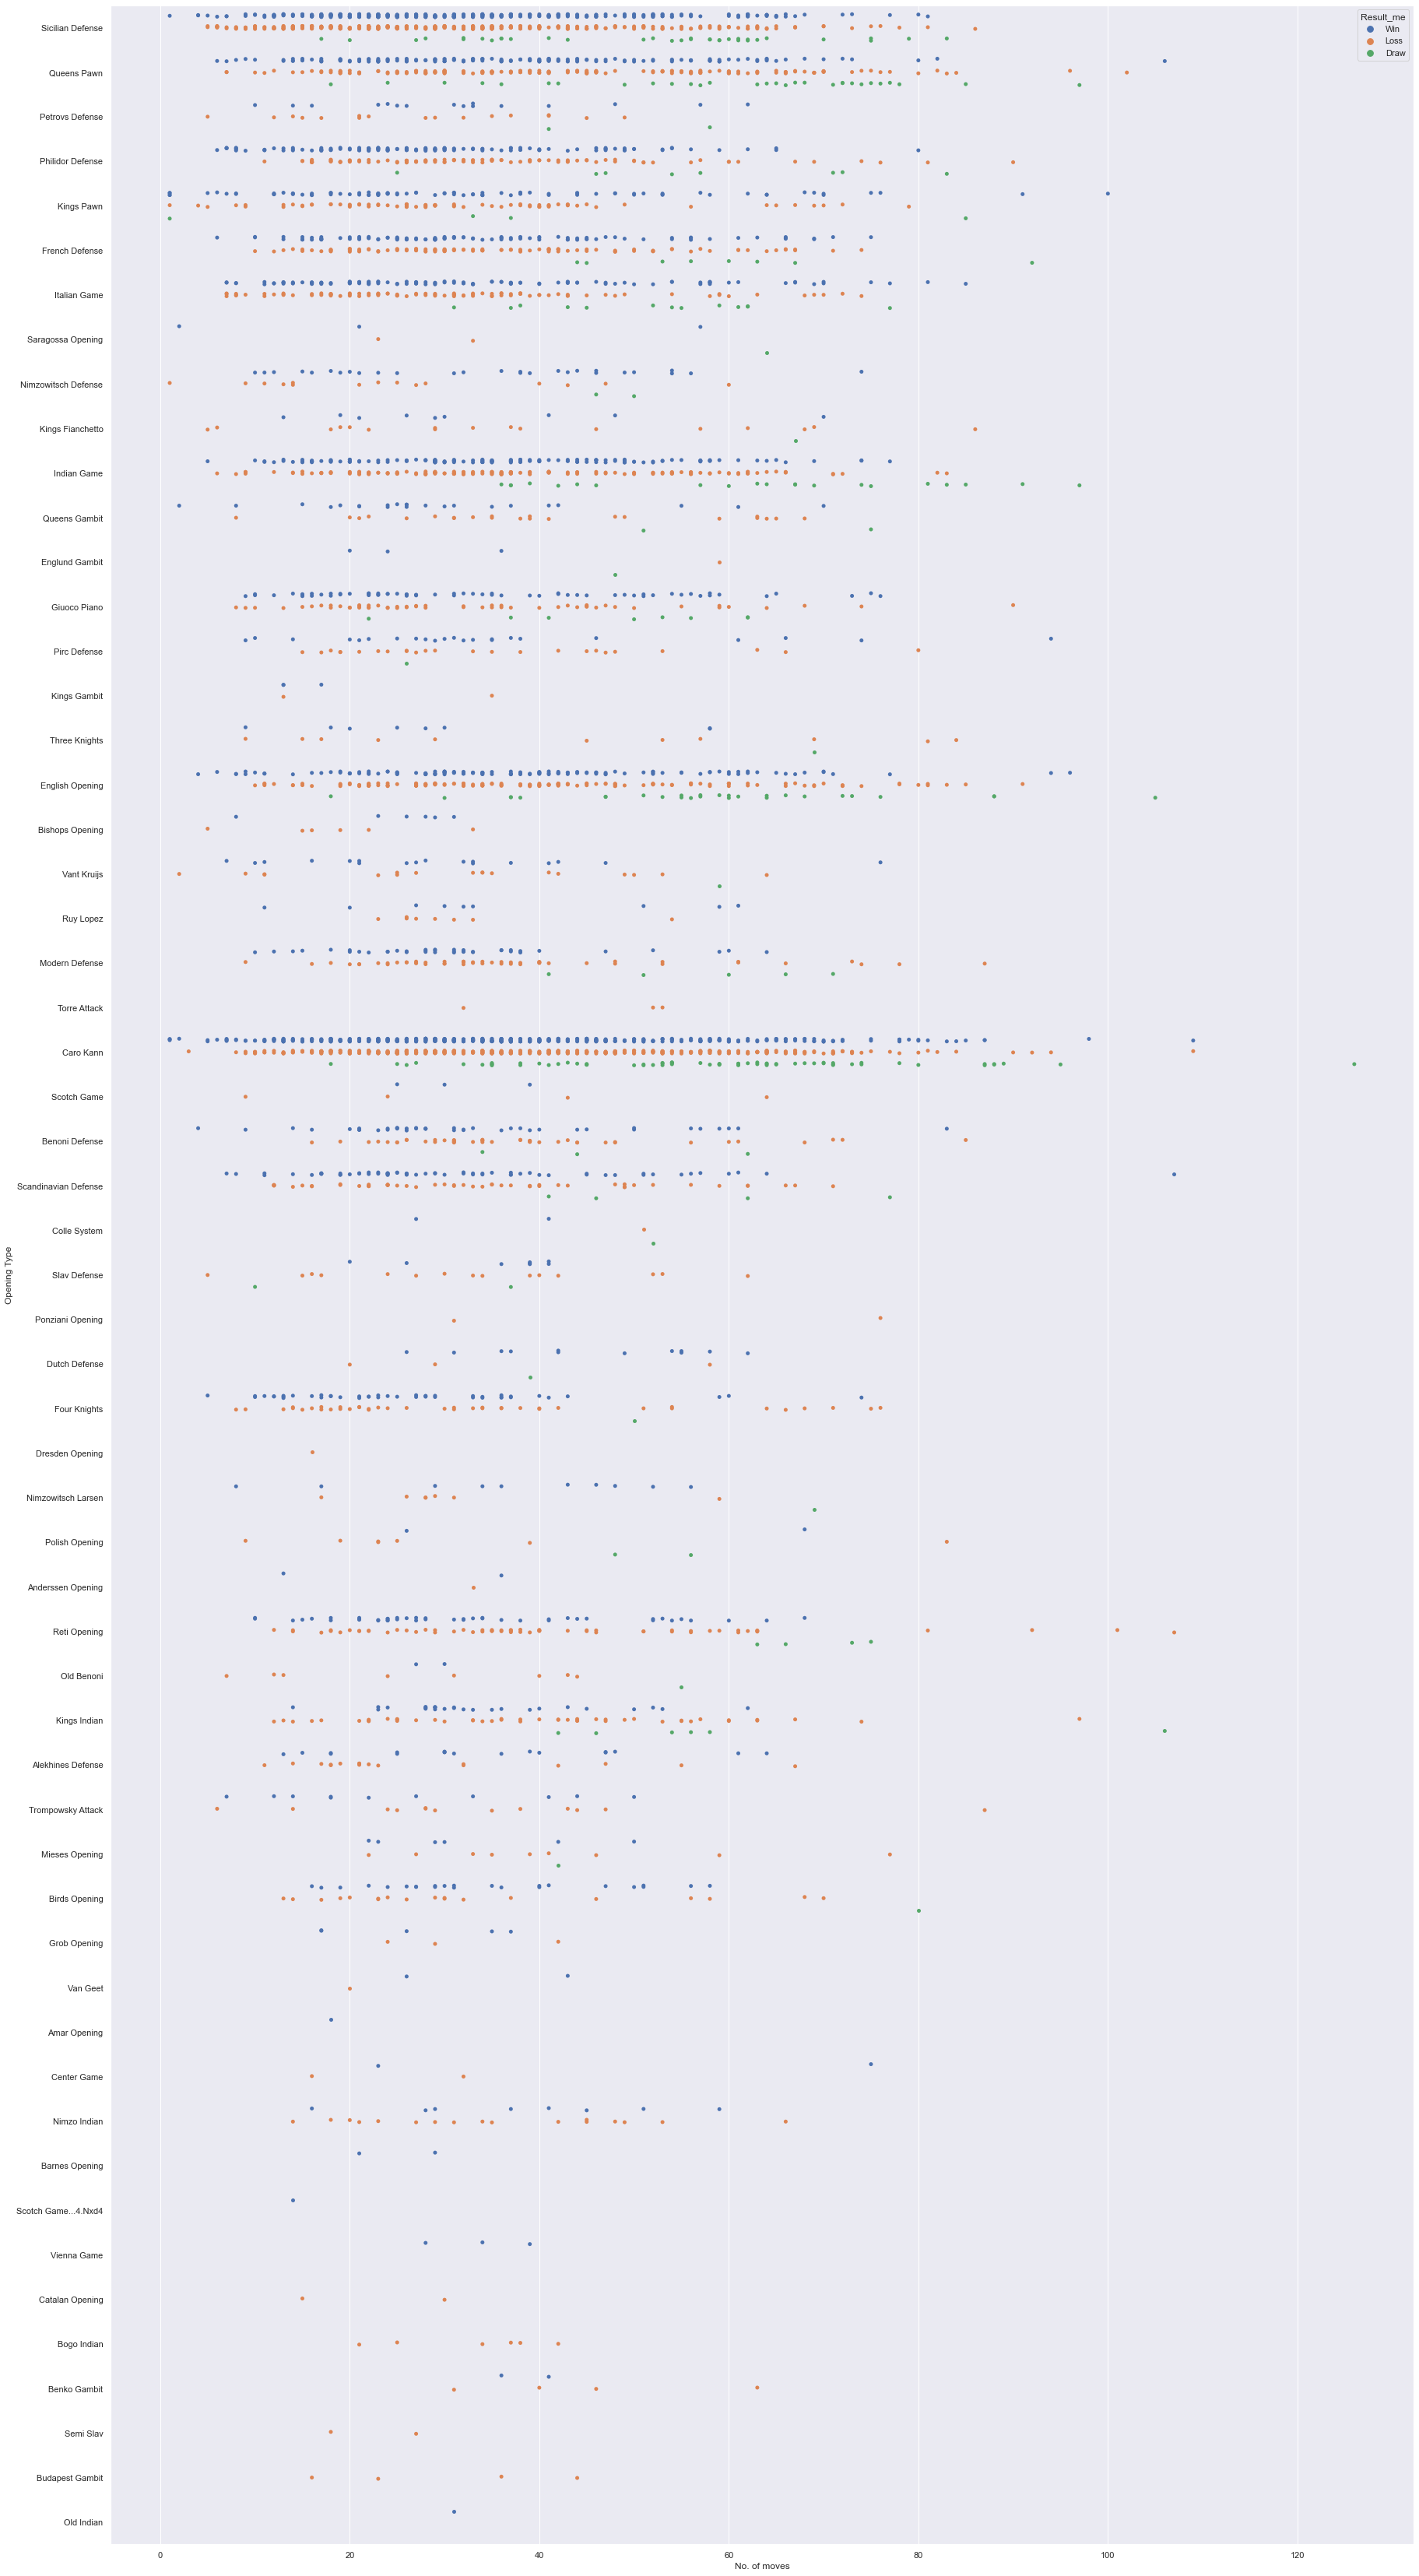

In [36]:
fig, ax = plt.subplots(figsize=(30,60))
sns.stripplot(data=df600, x="No. of moves", y="Opening Type", hue="Result_me", dodge=True)

<AxesSubplot:xlabel='Rating diff (opp-me)', ylabel='Result_me'>

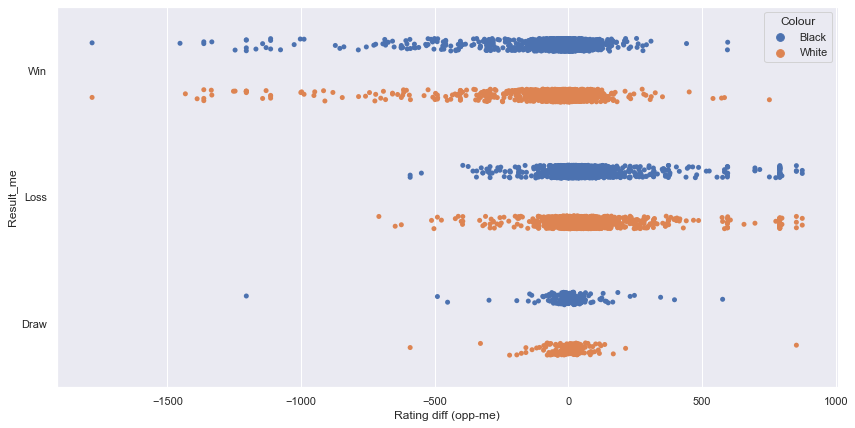

In [43]:
sns.stripplot(data=df, x="Rating diff (opp-me)", y="Result_me", hue="Colour", dodge=True)

<AxesSubplot:xlabel='Rating diff (opp-me)', ylabel='Result_me'>

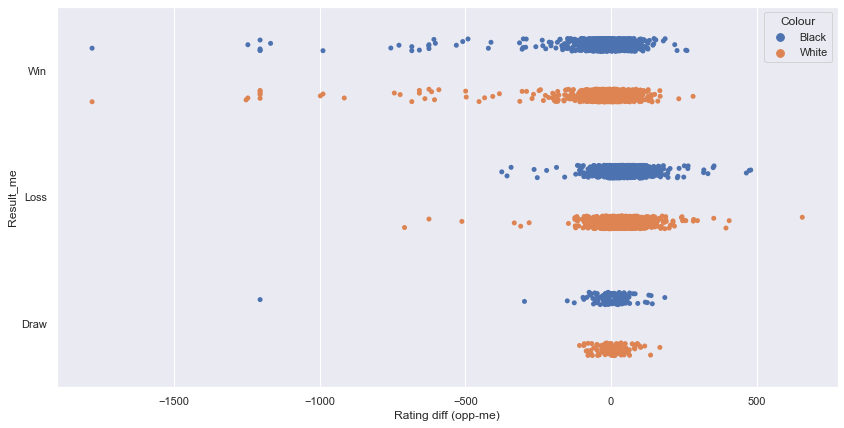

In [44]:
sns.stripplot(data=df600, x="Rating diff (opp-me)", y="Result_me", hue="Colour", dodge=True)